In [89]:
import pandas as pd
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

url = "UpdatedResumeDataSet.csv"

# Assign colum names to the dataset
names = ['Category', 'Resume']

# Read dataset to pandas dataframe
df = pd.read_csv(url, names=names, header= 0)

# Some elements of this projects are taken from: Gaurav Dutta
# https://www.kaggle.com/gauravduttakiit

# Check for further details
# https://www.kaggle.com/gauravduttakiit/resume-screening-using-machine-learning/notebook

In [90]:
display(df)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [91]:
display(df.Category.unique())
display(df.info())

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


None

In [92]:
display(df['Resume'][2])

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\r\nJanuary 2015    DEEKSHA CENTER\r\nJanuary 2013    Little Flower Public School\r\nAugust 2000    Manipal Academy of Higher\r\nDATA SCIENCE \r\n\r\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\r\nSkill Details \r\nData Analysis-

In [93]:
# sens=[]
# resume= df['Resume'][1].split("\r\n" )
# keywords = []
# xx= []
# x=""
# for sent in resume:
#     while "-" in sent:
#             sent = sent.replace("-", "")
#     for word in sent.split(" "):
#         if(word.isalnum() or ":" in word):
#             keywords.append(word)
#             x+=  word+ " "
#     xx.append(x)
#     x=""
# display(xx)



## 
import re
# taken from source
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
df.tail()


,Category,Resume,cleaned_resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Skill Set OS Windows XP 7 8 8 1 10 Database MY...


In [94]:
# conda install -c conda-forge wordcloud
# taken from source with some modification
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

print(len(df.Resume)) #num of resumes

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
# for i in range(1,len(df.Resume)): # for all data
for i in range(0, 150):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    wordfreqdist = nltk.FreqDist(totalWords)## freq using dict
    mostcommon = wordfreqdist.most_common(50)##top 50
    
    '''
   #Print each candidates's most common words
    print("Candidate number: ",i)
    print(mostcommon)
    print("\n\n\n")
    mostcommon.clear()
#    '''
    
## for all    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
# print(string.punctuation)
print(mostcommon)




962
[('Details', 452), ('Exprience', 402), ('months', 340), ('company', 300), ('description', 280), ('1', 256), ('year', 224), ('January', 206), ('Data', 200), ('Less', 196), ('data', 182), ('Python', 156), ('Skill', 156), ('Science', 154), ('6', 148), ('I', 142), ('Maharashtra', 142), ('Education', 134), ('College', 130), ('like', 122), ('The', 118), ('Learning', 116), ('Machine', 112), ('India', 112), ('University', 102), ('using', 100), ('project', 100), ('monthsCompany', 94), ('learning', 90), ('Arts', 90), ('B', 88), ('C', 86), ('Mumbai', 86), ('SQL', 80), ('A', 78), ('Responsibilities', 76), ('Pune', 74), ('time', 72), ('various', 72), ('Engineering', 72), ('Project', 72), ('projects', 72), ('development', 70), ('Web', 70), ('Management', 70), ('Council', 70), ('SAP', 68), ('knowledge', 66), ('Company', 66), ('Skills', 64)]


In [95]:
from sklearn.preprocessing import LabelEncoder

df['CategoryLabel']= df['Category'].copy()
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [96]:
sens=[]
resume= df['cleaned_resume'][6].split("\r\n")

# display(resume)
# if(resume[0].startswith("â")):
#     resume[0].startswith("â", "")
# display(resume)
# for x in range(len(resume)):
#     if(x.in)
for sen in resume:
    if(sen != " " or sen != ""):
        sens.append(sen.split(" * "or" *"or "*" or "* "))
# sens.pop()

display(sens)



[['Skills Python Tableau Data Visualization R Studio Machine Learning Statistics IABAC Certified Data Scientist with versatile experience over 1 years in managing business data science consulting and leading innovation projects bringing business ideas to working real world solutions Being a strong advocator of augmented era where human capabilities are enhanced by machines Fahed is passionate about bringing business concepts in area of machine learning AI robotics etc to real life solutions Education Details January 2017 B Tech Computer Science Engineering Mohali Punjab Indo Global College of Engineering Data Science Consultant Data Science Consultant Datamites Skill Details MACHINE LEARNING Exprience 13 months PYTHON Exprience 24 months SOLUTIONS Exprience 24 months DATA SCIENCE Exprience 24 months DATA VISUALIZATION Exprience 24 months Tableau Exprience 24 monthsCompany Details company Datamites description Analyzed and processed complex data sets using advanced querying visualizatio

In [97]:
df.head()

,Category,Resume,cleaned_resume,CategoryLabel
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,Data Science
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,Data Science
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,Data Science
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Data Science
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,Data Science


In [98]:
# for explaination only
dff= df.copy()
dff.Category.value_counts()
del dff

In [99]:
df.Category.value_counts()


15    84
23    70
8     55
20    48
24    45
12    44
13    42
6     40
18    40
22    40
3     40
10    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [100]:
df.sample(20)



,Category,Resume,cleaned_resume,CategoryLabel
241,22,SKILLS 1. MS-Office 2. Good Communication skil...,SKILLS 1 MS Office 2 Good Communication skills...,Sales
894,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...,Testing
920,23,â¢ Good logical and analytical skills â¢ Pos...,Good logical and analytical skills Positive a...,Testing
850,9,"Technical Skills CATEGORY SKILLS Language C, C...",Technical Skills CATEGORY SKILLS Language C C ...,DotNet Developer
18,6,Personal Skills â¢ Ability to quickly grasp t...,Personal Skills Ability to quickly grasp techn...,Data Science
162,24,"Technical Skills Web Technologies: Angular JS,...",Technical Skills Web Technologies Angular JS H...,Web Designing
90,0,Skills: Natural Languages: Proficient in Engli...,Skills Natural Languages Proficient in English...,Advocate
156,24,Education Details \r\n B.C.A Bachelor Computer...,Education Details B C A Bachelor Computer Appl...,Web Designing
562,20,â¢ Operating Systems: Windows â¢ Others: MS ...,Operating Systems Windows Others MS Excel MS ...,Python Developer
419,4,Key Skills - Requirement Gathering - Requireme...,Key Skills Requirement Gathering Requirement A...,Business Analyst


In [101]:
stuffers = []
wordsList= []
skills=[]

 

'''
#string[0] ==> before Skill details (ALL SKILLS!)
#string[1] ==> after Skill details & before desc ==> excluded
#string[2] ==> after desc (ALL words)
'''

 

## testting
# string = str(df["cleaned_resume"][0]).lower().replace("skill details", "description").split("description")
# print(string[0])

 


# '''
for resume in df["cleaned_resume"]:
    string = str(resume).lower().replace("skill details", "description").split("description", 2)
    string[0] = string[0].split("education")[0]
    try:
        numSkill= len(string[0].split(" "))
        numWords= len(string[2].split(" "))
        wordsList.append(numWords)
        skills.append(numSkill)
        if numWords < 600 and numSkill < 125:
            stuffers.append("Not Stuffer")
        else:
            stuffers.append("Stuffer")
    except:
        sutffers.append("Stuffer")
        
count = 0       
for stuffer in stuffers:
    if stuffer == "Not Stuffer":
        count += 1
print("Not Stuffers % : ",count/len(stuffers)*100)
df['result']= stuffers
df['skill freq']= skills
df['words freq']= wordsList

 

print("Stuffers: ",stuffers.count("Stuffer"))
print("Not Stuffers: ",stuffers.count("Not Stuffer"))

 

df.head()
# '''

Not Stuffers % :  75.36382536382537
Stuffers:  237
Not Stuffers:  725


,Category,Resume,cleaned_resume,CategoryLabel,result,skill freq,words freq
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...,Data Science,Not Stuffer,85,537
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,Data Science,Not Stuffer,1,96
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,Data Science,Not Stuffer,87,81
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,Data Science,Stuffer,32,809
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,Data Science,Not Stuffer,1,2


In [102]:
# sens=[]
# resume= df['cleaned_resume'][0].split("\r\n")

# # display(resume)
# # if(resume[0].startswith("â")):
# #     resume[0].startswith("â", "")
# # display(resume)
# # for x in range(len(resume)):
# #     if(x.in)
# for sen in resume:
#     if(sen != " " or sen != ""):
#         sens.append(sen.split(" * "or" *"or "*" or "* "))
# # sens.pop()

# display(sens)



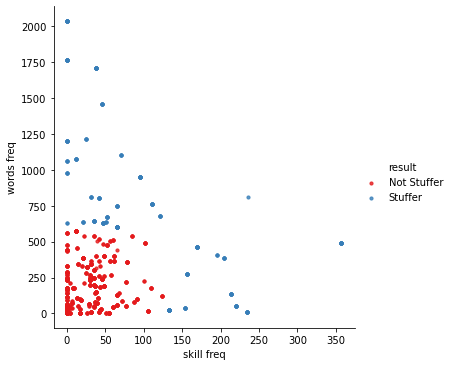

In [103]:
import seaborn as sns
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt


sns.lmplot(x='skill freq', y= 'words freq',  data=df, hue='result',
           palette='Set1', fit_reg=False, scatter_kws={"s": 10});

In [104]:
freq = df[['skill freq','words freq']] #.as_matrix()
print(freq.iloc[3])
type_label = np.where(df['result']=='Stuffer', 1, 0)
print(type_label)

# Feature names
features = df.columns.values[1:].tolist()
features

skill freq     32
words freq    809
Name: 3, dtype: int64
[0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1

['Resume',
 'cleaned_resume',
 'CategoryLabel',
 'result',
 'skill freq',
 'words freq']

In [105]:
# Fit the SVM model
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#print(scaler.fit(freq))
#freq = scaler.fit_transform(freq)

#Worked wither it is scaled or not
model = svm.SVC(kernel='linear')
model.fit(freq, type_label)
print(model.predict(freq))
print(model.predict([[freq.iloc[4][0],freq.iloc[4][1]]]))

[1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 0 1 0 

In [106]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 300) #to make the preceptron clearer
yy = a * xx - (model.intercept_[0]) / w[1]

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

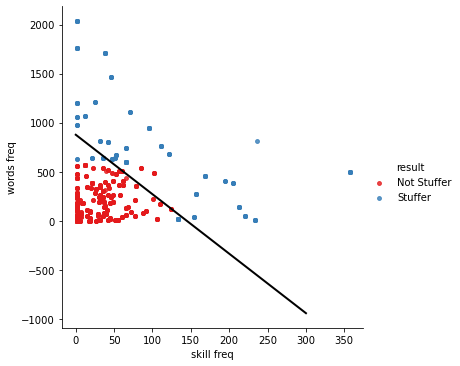

In [107]:
# Plot the hyperplane
sns.lmplot(x= 'skill freq', y = 'words freq', data=df, hue='result', palette='Set1', fit_reg=False, scatter_kws={"s": 15})
plt.plot(xx, yy, linewidth=2, color='black');

In [108]:
# # Look at the margins and support vectors
# sns.lmplot(x='skill freq', y='words freq', data=df, hue='result', palette='Set1', fit_reg=False, scatter_kws={"s": 15})
# plt.plot(xx, yy, linewidth=2, color='black')
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')
# plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
#             s=100, facecolors='none');

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
# taken from source
requiredText = df['cleaned_resume'].values
#print(requiredText)
requiredTarget = df['Category'].values
#print(requiredText)

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.25,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

Feature completed .....
(721, 7351)
(241, 7351)


In [110]:
# Gaurav Dutta :)
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
print(X_test)
prediction = clf.predict(X_test)
print(clf.predict(X_test))
# Not Gaurav Dutta :)
print(clf.predict(X_test[0]))
#for cv in requiredText:
 #   print(cv)

print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))



  (0, 7327)	0.07249749679765144
  (0, 7325)	0.0732297893614119
  (0, 7278)	0.024046487266907737
  (0, 7272)	0.062441736085650464
  (0, 7203)	0.06932760097369385
  (0, 6988)	0.06939405919879374
  (0, 6987)	0.07815626755442276
  (0, 6930)	0.044126563066147026
  (0, 6880)	0.049129692655430136
  (0, 6845)	0.07815626755442276
  (0, 6767)	0.06302035591716179
  (0, 6766)	0.13592019177005935
  (0, 6680)	0.04054383615405635
  (0, 6614)	0.0300302986566773
  (0, 6571)	0.04984307863410266
  (0, 6563)	0.04335990191712683
  (0, 6562)	0.13233006405285963
  (0, 6557)	0.02200477929144566
  (0, 6436)	0.0323022652713826
  (0, 6380)	0.05660890658314407
  (0, 6374)	0.07815626755442276
  (0, 6358)	0.05009353315343276
  (0, 6356)	0.04568796043973033
  (0, 6344)	0.1865038605512965
  (0, 6285)	0.045833753339932656
  :	:
  (240, 1710)	0.04976861255086334
  (240, 1672)	0.041230047329651735
  (240, 1626)	0.09460608704819229
  (240, 1567)	0.11109867383360275
  (240, 1455)	0.03190619521153069
  (240, 1408)	0.027038

In [111]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       0.80      0.67      0.73         6
           3       1.00      1.00      1.00        10
           4       1.00      1.00      1.00         7
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         8
           8       1.00      0.93      0.96        14
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00        10
          11       0.88      1.00      0.93         7
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        11
          14       1.00      1.00      1.00         8
          15       1.00      1.00      1.

In [112]:
# print(df['Category'].unique())

# df = pd.get_dummies(df, columns=['CategoryLabel'])
# display(df)
n=0
totalWords=[]
cats= df['CategoryLabel'].unique()
import string

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])

for cat in cats:
    print(cat)
    df1= df[df['CategoryLabel'] == cat] # DF contains all resume in that category
    for resume in df1['cleaned_resume']:
            string = str(resume).lower().replace("skill details", "description").split("description", 2)

            requiredWords = nltk.word_tokenize(string[0])
#             print(requiredWords)
#             print(string[0])
#             print(len(string))
            for word in requiredWords:
                if word not in oneSetOfStopWords :
                    totalWords.append(word)






#             ## for all    
    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(50)
#     print(string.punctuation)
    #print(mostcommon)
#     break;

Data Science
HR
Advocate
Arts
Web Designing
Mechanical Engineer
Sales
Health and fitness
Civil Engineer
Java Developer
Business Analyst
SAP Developer
Automation Testing
Electrical Engineering
Operations Manager
Python Developer
DevOps Engineer
Network Security Engineer
PMO
Database
Hadoop
ETL Developer
DotNet Developer
Blockchain
Testing


In [113]:
import re
#6 == Data Sience
xCat= 6
            
            

 

 

 


oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
months= ["january", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November",  "December"]
for m in months:
    oneSetOfStopWords.add(m.lower())
totalWords=[]
cats= df['Category'].unique()
 

 

 


def category(cat):
    df3= df[df['Category'] == cat] # DF contains all resume in that category
#     display(df3)

 

 

 

    for resume in df3['cleaned_resume']:
        stringg = str(resume).lower().replace("skill details", "description").split("description", 2)
        stringg[0] = re.sub(r'\d+', '', stringg[0])
        requiredWords = nltk.word_tokenize(stringg[0])
        
        for word in requiredWords:
            if word not in oneSetOfStopWords :
                totalWords.append(word)
    #print(cat)
    wordfreqdist = nltk.FreqDist(totalWords)
    mostcommon = wordfreqdist.most_common(100)
    #print(mostcommon)
    return mostcommon
#     print(stringg[0])
#     return mostcommon
category(xCat)   

[('data', 112),
 ('science', 80),
 ('python', 48),
 ('education', 44),
 ('details', 40),
 ('engineering', 40),
 ('learning', 32),
 ('b', 32),
 ('skills', 28),
 ('analytics', 28),
 ('institute', 28),
 ('machine', 24),
 ('tech', 24),
 ('technology', 24),
 ('business', 24),
 ('computer', 20),
 ('scientist', 20),
 ('college', 20),
 ('pradesh', 20),
 ('programming', 16),
 ('sql', 16),
 ('electronics', 16),
 ('sap', 16),
 ('consultant', 16),
 ('madhya', 16),
 ('java', 12),
 ('analysis', 12),
 ('tableau', 12),
 ('deep', 12),
 ('e', 12),
 ('technical', 12),
 ('school', 12),
 ('hana', 12),
 ('communication', 12),
 ('microsoft', 12),
 ('experience', 12),
 ('languages', 8),
 ('learn', 8),
 ('matplotlib', 8),
 ('decision', 8),
 ('word', 8),
 ('modelling', 8),
 ('mysql', 8),
 ('js', 8),
 ('html', 8),
 ('flask', 8),
 ('assurance', 8),
 ('associate', 8),
 ('web', 8),
 ('bangalore', 8),
 ('matlab', 8),
 ('intermediate', 8),
 ('basics', 8),
 ('electrical', 8),
 ('manipal', 8),
 ('academy', 8),
 ('r', 8

In [114]:
# df11 = df.copy()
# def resumeParser(df):
#     i = 0
#     for resume in df:
#         df11.iloc[i] = resume
#     #resume = cleanResume(resume)
#     df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))
#     stuffers = []
#     count = 0
#     for resume in df['cleaned_resume']:
#         string = str(resume).lower().replace("skill details", "description").split("description", 2)
#         string[0] = string[0].split("education")[0]
#         numSkill= len(string[0].split(" "))
#         numWords= len(string[2].split(" "))
#         if model.predict([[numWords, numSkill]])[0] == 0:
#             stuffers.append("Not Stuffer")
#         else:
#             stuffers.append("Stuffer")
#     df["result"] = stuffers
#     requiredText = df11['cleaned_resume'].values
#     word_vectorizer = TfidfVectorizer(
#     sublinear_tf=True,
#     stop_words='english')
#     word_vectorizer.fit(requiredText)
#     WordFeatures = word_vectorizer.transform(requiredText)
#     count = 0
#     knnPrediction = clf.predict(WordFeatures)
#     favourability = []
#     for resume in df['cleaned_resume']:
#         words = []
#         mostcommon = category(knnPrediction[count])
#         countCommon = 0
#         for word in resume.split(" "):
#             if word in mostcommon and word not in words:
#                 countCommon +=1
#                 words.append(word)
#         favourability.append(countCommon/(len(mostcommon))*100)
#     df["Favourability"] = favourability
#     return df
# #df10 = resumeParser(df.iloc[:5])                

# df10.sample(20)

In [115]:
def resumeParser(resume):
    words= []
    resume = cleanResume(resume)
    string = str(resume).lower().replace("skill details", "description").split("description", 2)
    string[0] = string[0].split("education")[0]
    numSkill= len(string[0].split(" "))
    numWords= len(string[2].split(" "))
    if model.predict([[numWords, numSkill]])[0] == 1:
        return "Stuffer"
    requiredText = df['cleaned_resume'].values
    requiredText[0] = resume
    word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
    word_vectorizer.fit(requiredText)
    WordFeatures = word_vectorizer.transform(requiredText)
    knnPrediction = clf.predict(WordFeatures)[0]
    mostcommon = category(knnPrediction)
    count = 0
    
    print("Category: ", df['CategoryLabel'].unique()[list(cats).index(knnPrediction)])
    for i in mostcommon:
        mostcommon[count] = i[0]
        count += 1
    count= 0
#     print(mostcommon)
    for word in resume.split(" "):
        if word in mostcommon and word not in words:
            # print(word)
            words.append(word)
            count +=1
#     print(mostcommon)
#     print(count)
    return count/len(mostcommon)*10*4//1
    
            
    

 

# df['counter'] = df.Resume.apply(lambda x: resumeParser(x))

import random
for i in range(20):
    cand = random.randint(0, 961)
    print("favourability for candidate "  + str(cand) +": "+ str(resumeParser(df['Resume'][cand])))
    print()
# display(df.sample(10))

favourability for candidate 868: Stuffer

favourability for candidate 752: Stuffer

favourability for candidate 276: Stuffer

Category:  Testing
favourability for candidate 904: 0.0

favourability for candidate 648: Stuffer

favourability for candidate 232: Stuffer

favourability for candidate 581: Stuffer

favourability for candidate 514: Stuffer

Category:  Data Science
favourability for candidate 16: 3.0

favourability for candidate 842: Stuffer

Category:  Python Developer
favourability for candidate 582: 2.0

Category:  Hadoop
favourability for candidate 782: 2.0

Category:  Java Developer
favourability for candidate 357: 1.0

favourability for candidate 905: Stuffer

Category:  Java Developer
favourability for candidate 360: 1.0

favourability for candidate 794: Stuffer

favourability for candidate 936: Stuffer

Category:  HR
favourability for candidate 81: 0.0

favourability for candidate 215: Stuffer

Category:  HR
favourability for candidate 77: 0.0

